In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

TEST_IMAGE_PATH = "../data/test6.jpg"
TEST_IMAGE = cv2.imread(TEST_IMAGE_PATH)
TEST_IMAGE = cv2.cvtColor(TEST_IMAGE, cv2.COLOR_BGR2RGB)

# Load Test iamges

In [2]:
print(f"""Image path: {TEST_IMAGE_PATH}
Image shape: {TEST_IMAGE.shape}""")

Image path: ../data/test6.jpg
Image shape: (998, 564, 3)


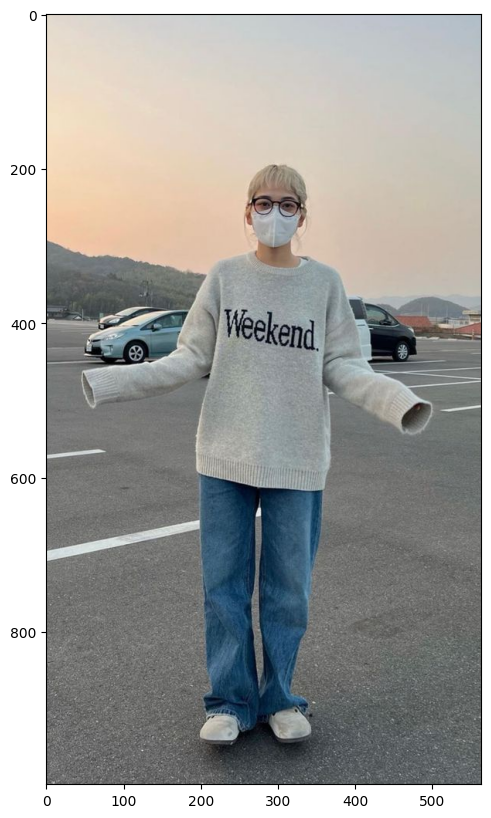

In [3]:
plt.figure(figsize=(10, 10))
plt.imshow(TEST_IMAGE)
plt.show()

# Model Initalize

In [4]:
from torchvision.transforms import transforms
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch
import utils
import time
import cv2

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [6]:
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True, num_keypoints=17,)
device = torch.device('cpu')
model.to(device).eval()

/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/bahk_insung/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=KeypointRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=KeypointRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

In [7]:
orig_image = TEST_IMAGE.copy()
orig_image = np.array(orig_image, dtype=np.float32) / 255.0

In [8]:
test_image = transform(TEST_IMAGE)
test_image = test_image.unsqueeze(0).to(device)

In [9]:
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '0'

In [10]:
start_time = time.time()
with torch.no_grad():
    predictions = model(test_image)
print("Time taken: {:.2f} seconds".format(time.time() - start_time))

print(predictions)

Time taken: 1.93 seconds
[{'boxes': tensor([[ 68.6302, 189.7836, 486.1753, 971.1940],
        [ 59.0208, 192.2581, 499.4010, 587.2518],
        [155.7903, 389.5507, 170.4678, 404.6683],
        [193.3320, 530.3588, 363.4402, 958.4688],
        [152.6168, 392.4737, 165.8116, 405.1198],
        [146.9579, 389.8809, 167.7998, 408.3885]]), 'labels': tensor([1, 1, 1, 1, 1, 1]), 'scores': tensor([0.9996, 0.4356, 0.2101, 0.1646, 0.1102, 0.0516]), 'keypoints': tensor([[[297.9807, 259.0841,   1.0000],
         [312.9465, 246.3478,   1.0000],
         [284.5115, 244.8494,   1.0000],
         [330.1571, 260.5825,   1.0000],
         [263.5594, 258.3349,   1.0000],
         [359.3404, 347.4892,   1.0000],
         [229.1381, 342.2448,   1.0000],
         [381.0407, 450.8781,   1.0000],
         [190.9754, 442.6369,   1.0000],
         [449.1351, 500.3249,   1.0000],
         [ 84.7184, 481.5950,   1.0000],
         [323.4225, 581.2380,   1.0000],
         [231.3830, 570.0001,   1.0000],
         [

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time taken: 1.76 seconds


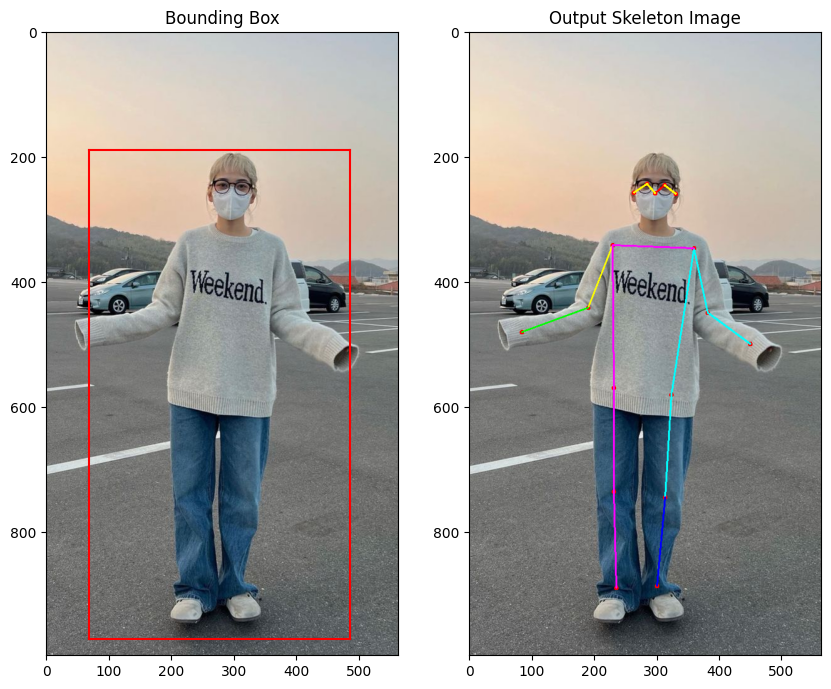

In [11]:
boxes = predictions[0]['boxes'].cpu().numpy().astype(np.int32)

start_time = time.time()
with torch.no_grad():
    predictions = model(test_image)
print("Time taken: {:.2f} seconds".format(time.time() - start_time))

output_image = utils.draw_keypoints(predictions, orig_image)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('Bounding Box')
plt.imshow(TEST_IMAGE)
plt.plot([boxes[0][0], boxes[0][2]], [boxes[0][1], boxes[0][1]], color='red')
plt.plot([boxes[0][0], boxes[0][2]], [boxes[0][3], boxes[0][3]], color='red')
plt.plot([boxes[0][0], boxes[0][0]], [boxes[0][1], boxes[0][3]], color='red')
plt.plot([boxes[0][2], boxes[0][2]], [boxes[0][1], boxes[0][3]], color='red')

plt.subplot(1, 2, 2)
plt.title('Output Skeleton Image')
plt.imshow(output_image)

plt.show()